In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import string

ModuleNotFoundError: No module named 'wordcloud'

# EDA

In [2]:
df = pd.read_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\combined_data.parquet')

In [14]:
df.head()

,date,rawContent,id,category,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,2020-05-01 01:54:11+00:00,@sezin4boe @VoteMatt4HoCo @Kirsten4BOE Did you...,1256039179248680961,Working Class Country,36,33,14,0,5.583333,236,9,2,4
1,2020-05-01 01:54:11+00:00,@sezin4boe @VoteMatt4HoCo @Kirsten4BOE Did you...,1256039179248680961,Rural Middle America,36,33,14,0,5.583333,236,9,2,4
2,2020-05-01 01:54:11+00:00,@sezin4boe @VoteMatt4HoCo @Kirsten4BOE Did you...,1256039179248680961,Big Cities,36,33,14,0,5.583333,236,9,2,4
3,2020-05-01 07:12:14+00:00,.@visitWyoming WY isn't WY without wild horses...,1256119219990626305,LDS Enclaves,27,25,6,0,5.148148,165,8,2,1
4,2020-05-01 07:12:14+00:00,.@visitWyoming WY isn't WY without wild horses...,1256119219990626305,Evangelical Hubs,27,25,6,0,5.148148,165,8,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17774726 entries, 0 to 19482
Data columns (total 4 columns):
 #   Column      Dtype              
---  ------      -----              
 0   date        datetime64[ns, UTC]
 1   rawContent  object             
 2   id          int64              
 3   category    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 678.1+ MB


In [5]:
df['category'].value_counts()

category
Big Cities                6961982
Graying America           4731866
Rural Middle America      1557254
Exurbs                    1341199
Evangelical Hubs          1019493
College Towns              939110
Middle Suburbs             299360
Hispanic Centers           299139
Urban Suburbs              249073
Working Class Country      168364
African American South      96221
Aging Farmlands             68476
Military Posts              24460
Native American Lands       11830
LDS Enclaves                 6899
Name: count, dtype: int64

In [3]:
tweets_per_month = df['date'].dt.strftime('%Y-%m').value_counts().sort_index().reset_index(name='counts')

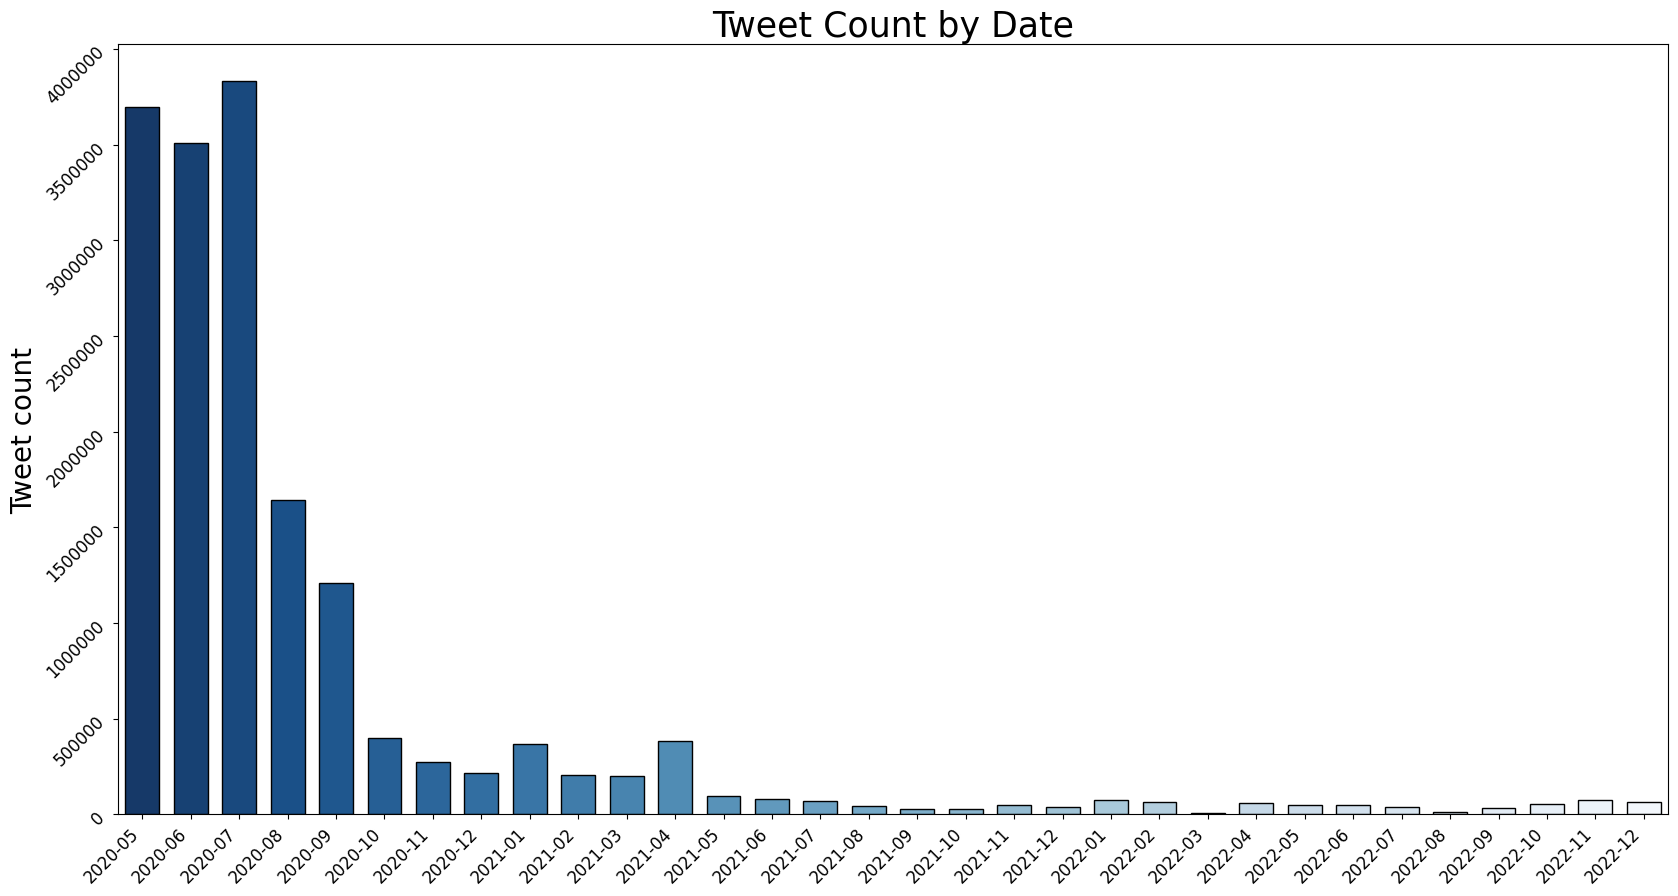

In [27]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='date', y='counts', data=tweets_per_month, edgecolor = 'black',errorbar=('ci', False), palette='Blues_r', width=0.7)
plt.title('Tweet Count by Date', fontsize=25)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, ha='right', fontsize=12)
#ax.bar_label(ax.containers[0], fmt='%.0f',padding=5, fontsize=12)
plt.ylabel('Tweet count', fontsize=20)
plt.xlabel('', fontsize=20)
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

In [29]:
tweets_per_category = df['category'].value_counts().reset_index(name='counts')

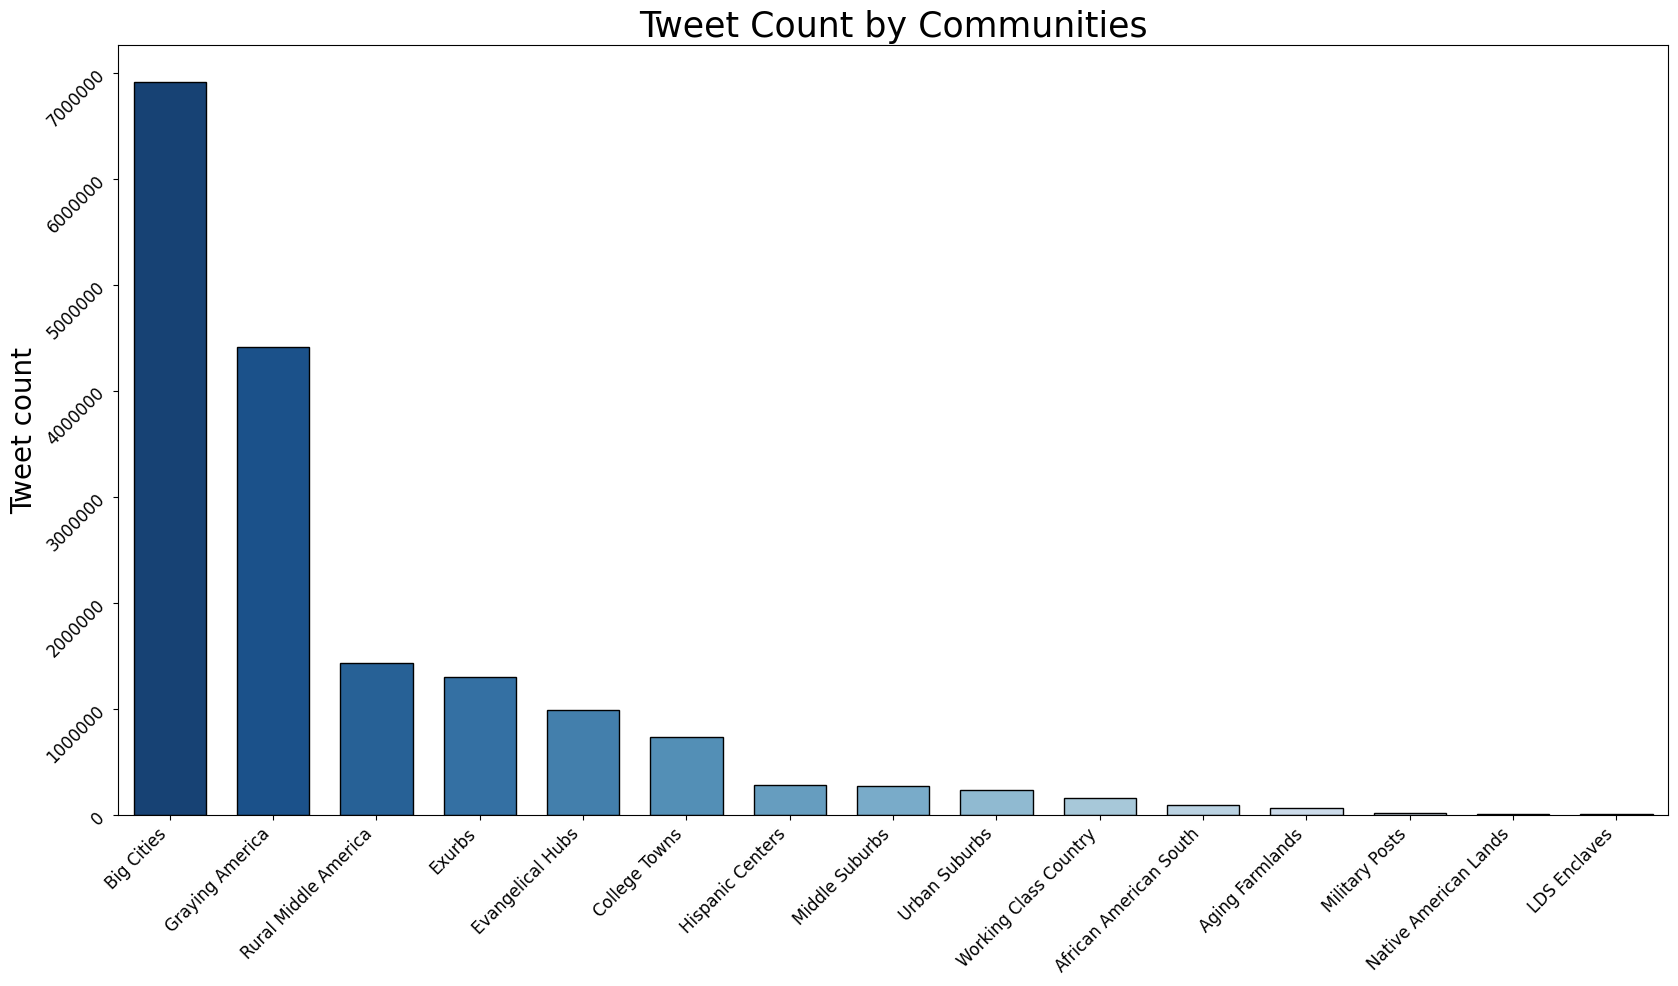

In [31]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='category', y='counts', data=tweets_per_category, edgecolor = 'black',errorbar=('ci', False), palette='Blues_r', width=0.7)
plt.title('Tweet Count by Communities', fontsize=25)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, ha='right', fontsize=12)
#ax.bar_label(ax.containers[0], fmt='%.0f',padding=5, fontsize=12)
plt.ylabel('Tweet count', fontsize=20)
plt.xlabel('', fontsize=20)
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

# Tweet Meta Data

In [4]:
# word_count
df['word_count'] = df['rawContent'].apply(lambda x: len(str(x).split()))

In [5]:
# unique_word_count
df['unique_word_count'] = df['rawContent'].apply(lambda x: len(set(str(x).split())))

In [7]:
# stop_word_count
df['stop_word_count'] = df['rawContent'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [8]:
# url_count
df['url_count'] = df['rawContent'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

In [9]:
# mean_word_length
df['mean_word_length'] = df['rawContent'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [10]:
# char_count
df['char_count'] = df['rawContent'].apply(lambda x: len(str(x)))

In [11]:
# punctuation_count
df['punctuation_count'] = df['rawContent'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [12]:
# hashtag_count
df['hashtag_count'] = df['rawContent'].apply(lambda x: len([c for c in str(x) if c == '#']))

In [13]:
# mention_count
df['mention_count'] = df['rawContent'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [20]:
meta = df[['date', 'category', 'word_count',
       'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
       'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']]

In [21]:
meta.to_parquet(r'C:\Users\fashaikh\Desktop\Thesis main\tweet_metadata.parquet')

# Analysis and N-grams

In [1]:
import wandb
import os
import datetime
import warnings
warnings.filterwarnings('ignore')
import threading
import time, timeit
from typing import Text, Dict, List, Union, Tuple, Optional, Set
import re
from ast import literal_eval
from collections import defaultdict, Counter

import emoji

import pandas as pd
pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore')

from pandarallel import pandarallel # Panadas Asynchronous processing
pandarallel.initialize()

import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import contractions
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


from transformers import (AutoTokenizer, TFAutoModelForSequenceClassification,
                          DistilBertTokenizerFast, TFDistilBertModel)

import tensorflow as tf
import tensorflow_addons as tfa
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras.preprocessing import text, sequence
from keras.layers import (Dropout, Dense, BatchNormalization,
                                     Activation, concatenate)
from keras.models import Model

from wandb.keras import WandbCallback
from IPython.display import clear_output
%matplotlib inline

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [2]:
plt.rcParams['figure.figsize'] = [18, 15]
plt.style.use('fivethirtyeight')

In [3]:
sns.set(rc={'figure.figsize':(18, 15)})
sns.set_theme(style="darkgrid")

In [7]:
df = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\sentiment_results\AfricanAmericanSouth_sentiment.parquet")

In [8]:
df.head()

,date,id,cleanedContent,label,probability.negative,probability.neutral,probability.positive
0,2020-05-06 11:07:40+00:00,1257990410028359681,Everyday that the killers of #AhmaudArbery remain free is another day of phycological abuse &amp; post traumatic stress disorder for Americans especially black men. So again we ask respectfully to...,negative,0.830641,0.159382,0.009977
1,2020-05-08 10:31:49+00:00,1258706164054929408,It took 59 days for the @user to arrest #GregoryMcMichael &amp; #TravisMcMichael for the murder of #AhmaudAubrey. Which begs the question do #BlackLivesMatter? Is the KKK still running Georgia? @u...,negative,0.806295,0.188493,0.005212
2,2020-05-08 10:31:49+00:00,1258706164054929408,It took 59 days for the @user to arrest #GregoryMcMichael &amp; #TravisMcMichael for the murder of #AhmaudAubrey. Which begs the question do #BlackLivesMatter? Is the KKK still running Georgia? @u...,negative,0.806295,0.188493,0.005212
3,2020-05-08 10:31:49+00:00,1258706164054929408,It took 59 days for the @user to arrest #GregoryMcMichael &amp; #TravisMcMichael for the murder of #AhmaudAubrey. Which begs the question do #BlackLivesMatter? Is the KKK still running Georgia? @u...,negative,0.806295,0.188493,0.005212
4,2020-05-08 10:31:49+00:00,1258706164054929408,It took 59 days for the @user to arrest #GregoryMcMichael &amp; #TravisMcMichael for the murder of #AhmaudAubrey. Which begs the question do #BlackLivesMatter? Is the KKK still running Georgia? @u...,negative,0.806295,0.188493,0.005212


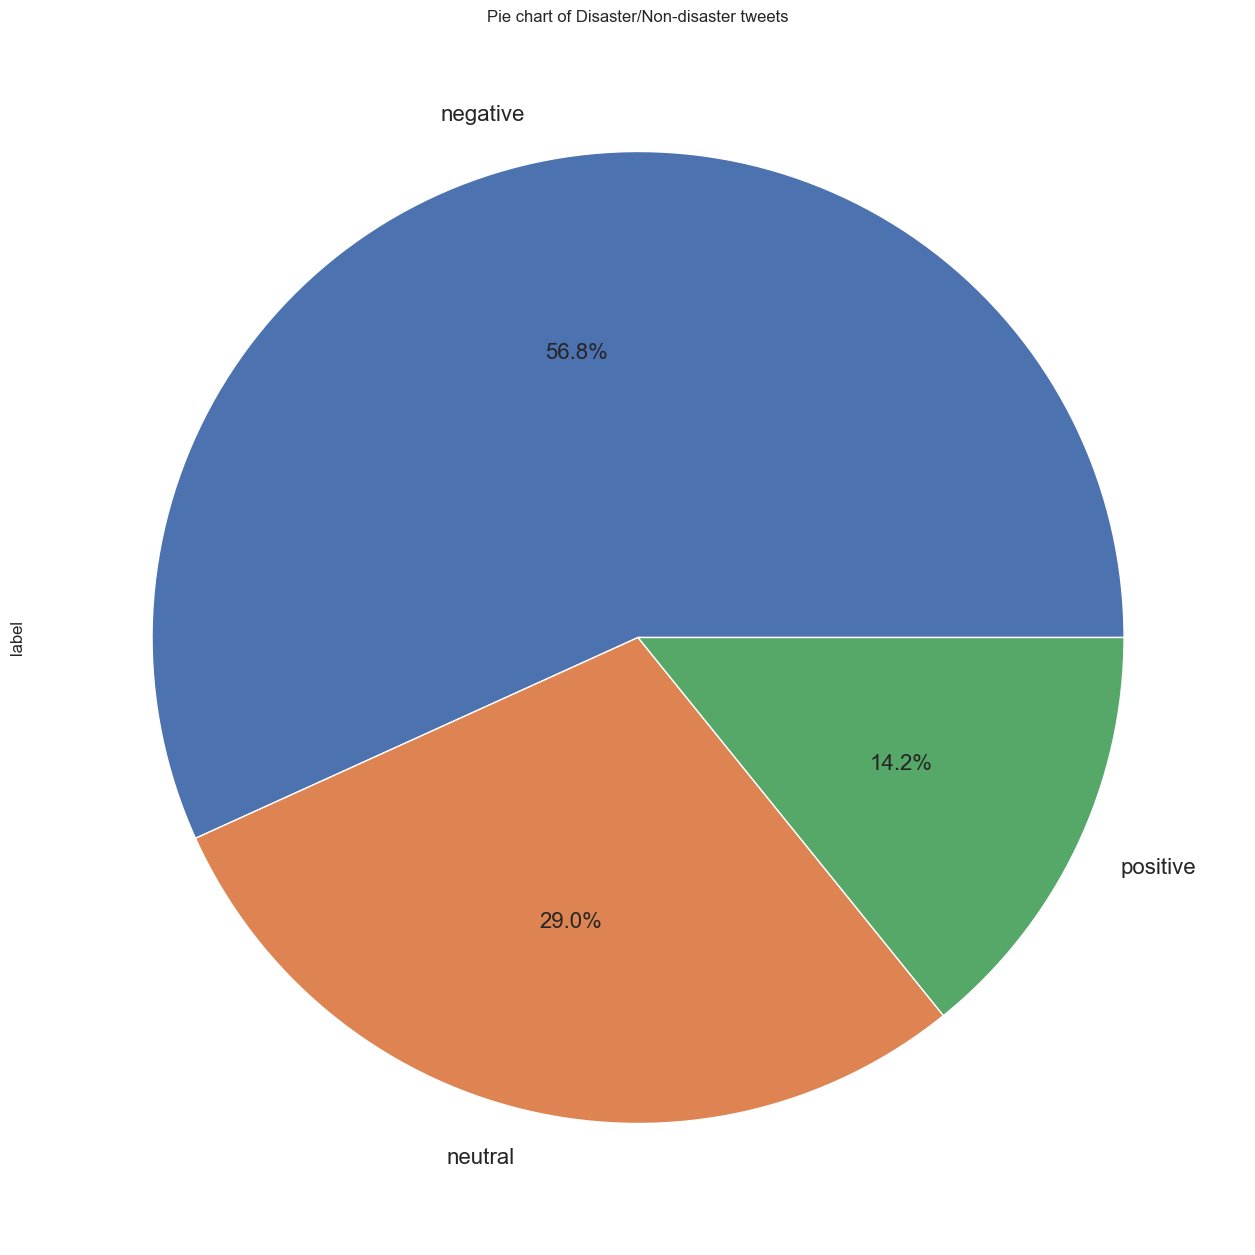

In [10]:
df['label'].value_counts().plot(kind='pie',
                                         title='Pie chart of Disaster/Non-disaster tweets', 
                                         autopct='%1.1f%%',
                                         shadow=False,
                                         legend = False, fontsize=16, figsize=(15,15))
plt.show()

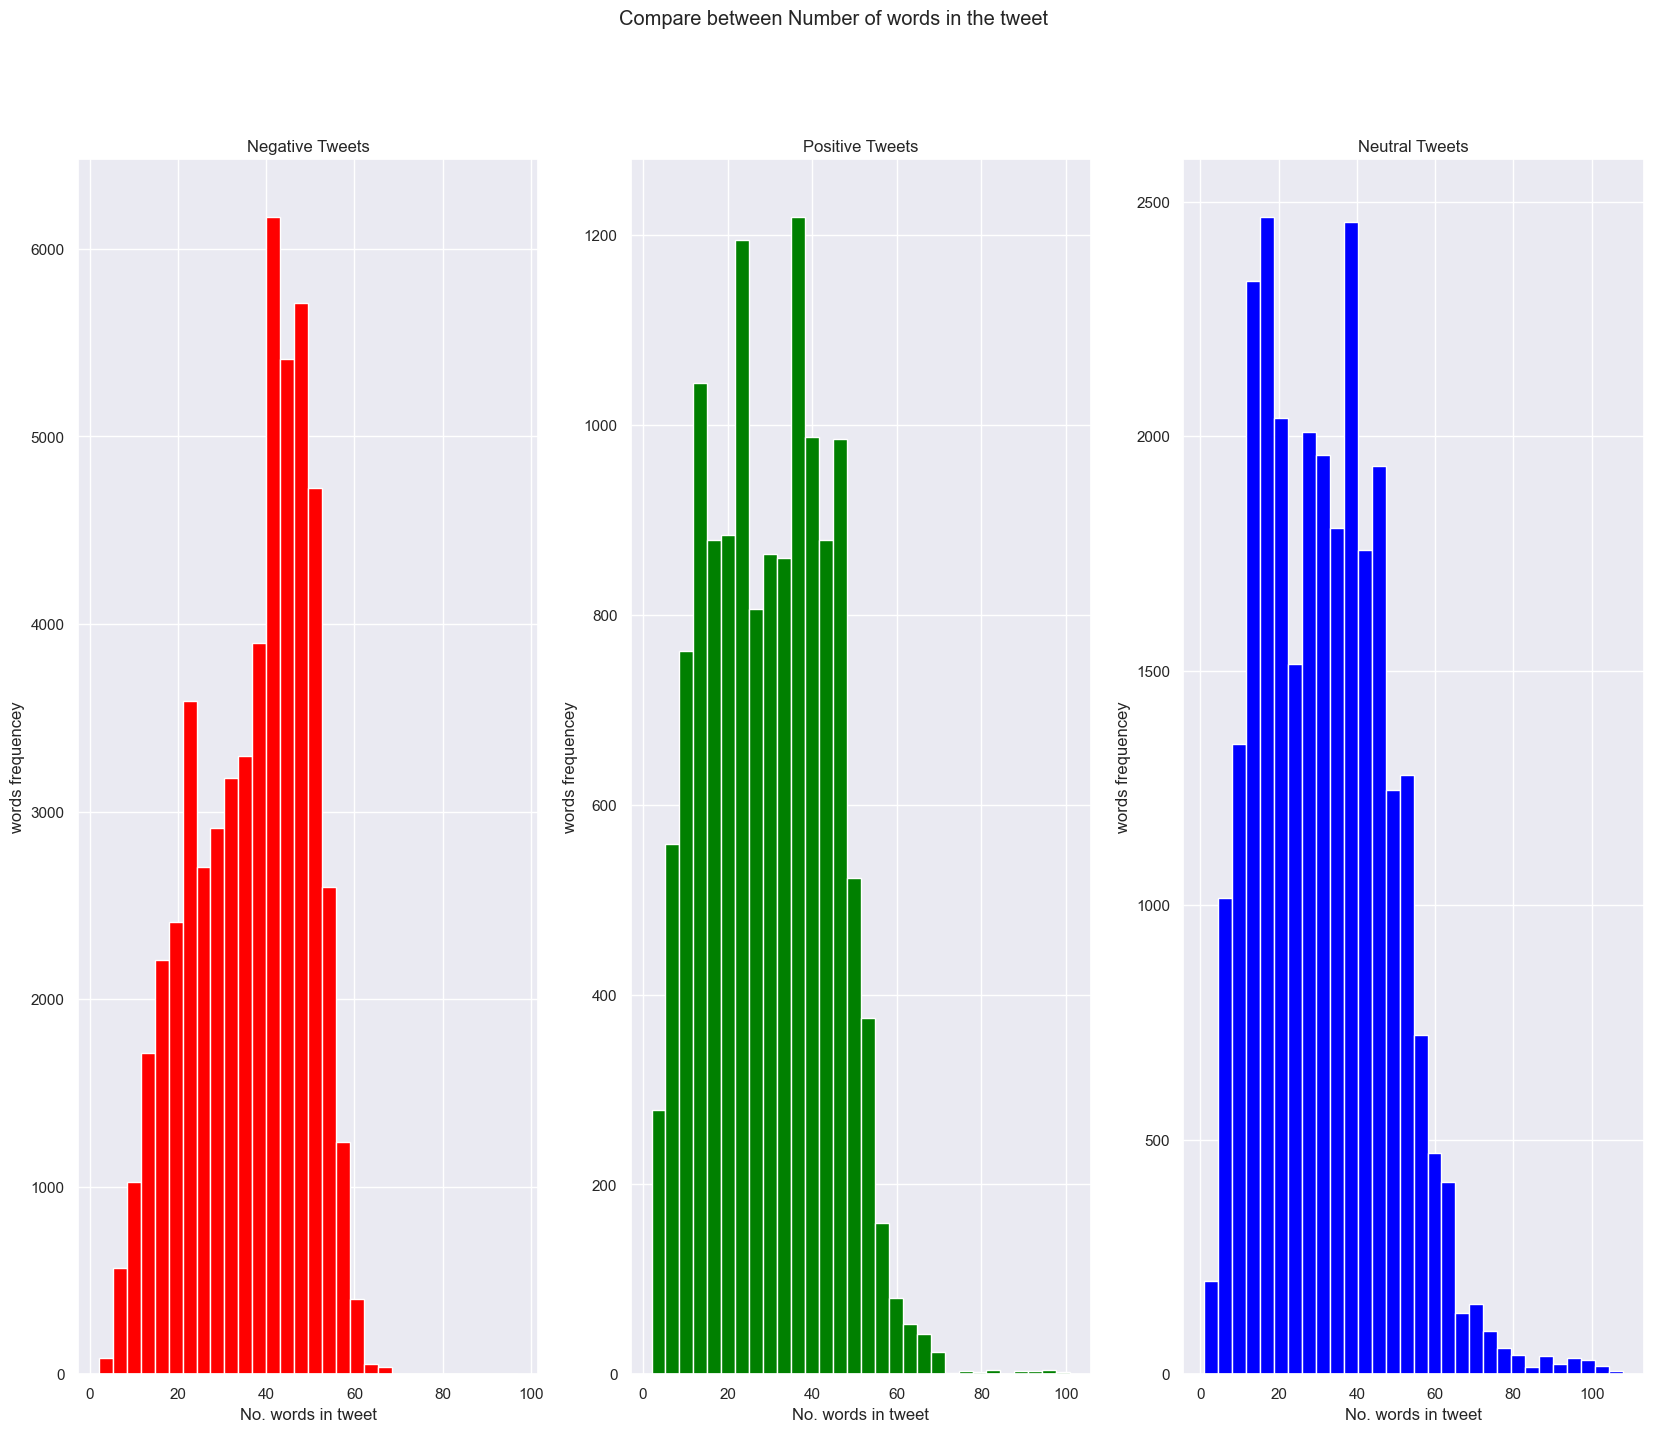

In [14]:
sns.set(style='darkgrid')
fig, axes = plt.subplots(1, 3)
fig.suptitle('Compare between Number of words in the tweet')

axes[0].hist(df[df['label'] == "negative"]['cleanedContent'].str.split().map(lambda word: len(word)),
             bins=30, color='red')
axes[0].set_ylabel('words frequencey')
axes[0].set_xlabel('No. words in tweet')
axes[0].set_title('Negative Tweets')


axes[1].hist(df[df['label'] == "positive"]['cleanedContent'].str.split().map(lambda word: len(word)),
             bins=30, color='green', label='Disaster')
axes[1].set_ylabel('words frequencey')
axes[1].set_xlabel('No. words in tweet')
axes[1].set_title('Positive Tweets')

axes[2].hist(df[df['label'] == "neutral"]['cleanedContent'].str.split().map(lambda word: len(word)),
             bins=30, color='blue', label='Disaster')
axes[2].set_ylabel('words frequencey')
axes[2].set_xlabel('No. words in tweet')
axes[2].set_title('Neutral Tweets')

plt.show()

In [26]:
#Remove stop words
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fashaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def plot_words_freq(dataframe: pd.DataFrame,
                    column: Text,
                    target_label: Text, axes) -> None:
    words_dict = {'word': [], 'count': []}
    words_count = Counter(
        ' '.join(dataframe[[column,'label']]\
                 .loc[dataframe['label'] == target_label]\
                 [column]).split()).most_common(100)
    
    for word, count in words_count:
        words_dict['word'].append(word)
        words_dict['count'].append(count)
    
    sns.barplot(x=words_dict['count'][:20], y=words_dict['word'][:20], ax=axes)
    axes.set_yticks(range(20), words_dict['word'][:20], size=16)

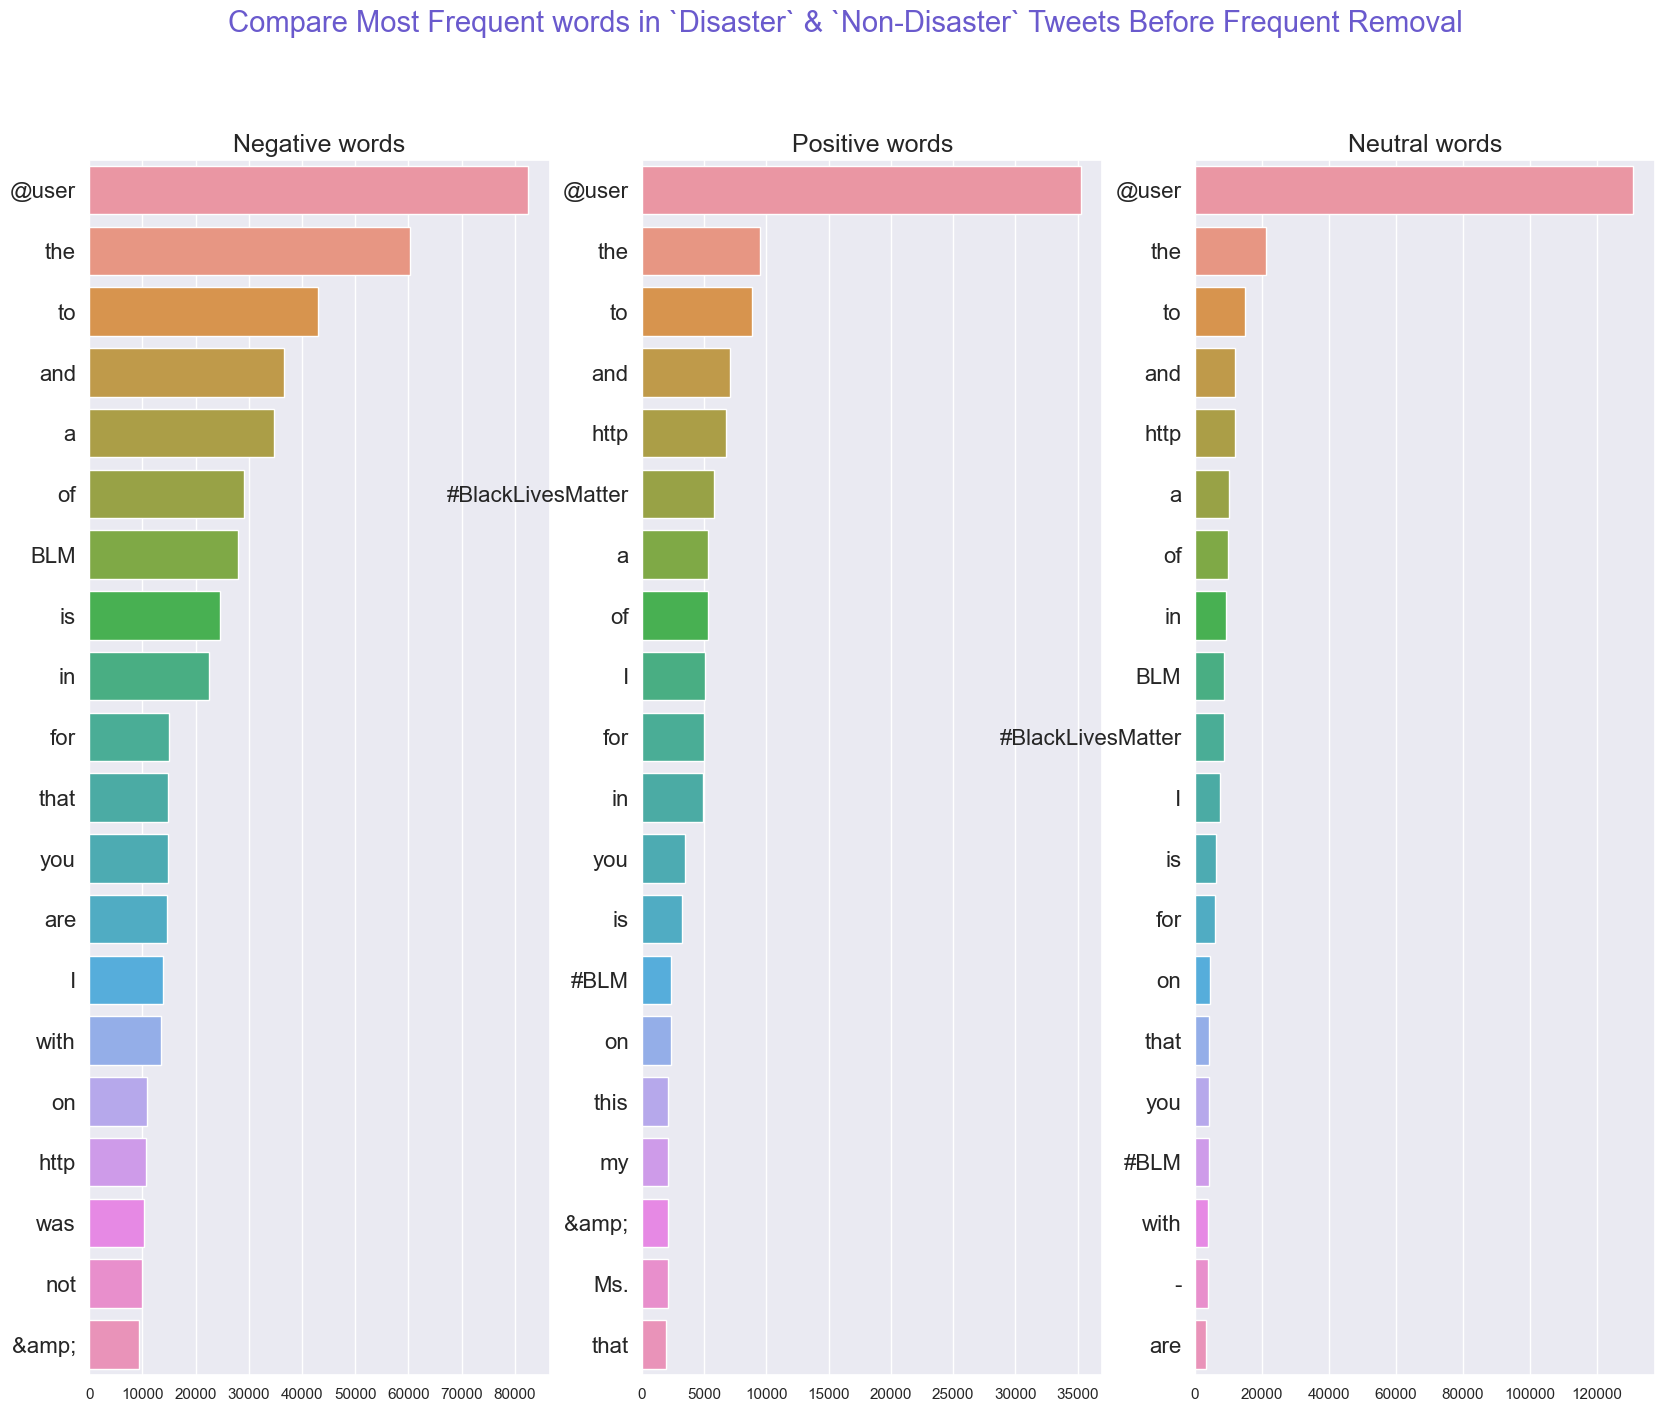

In [22]:
fig, axes = plt.subplots(1, 3)

fig.suptitle('Compare Most Frequent words in `Disaster` & `Non-Disaster` Tweets Before Frequent Removal',
             size=21, color='SlateBlue')
axes[0].set_title('Negative words', size=18)
axes[1].set_title('Positive words', size=18)
axes[2].set_title('Neutral words', size=18)

plot_words_freq(df, 'cleanedContent', target_label="negative", axes=axes[0])
plot_words_freq(df, 'cleanedContent', target_label="positive", axes=axes[1])
plot_words_freq(df, 'cleanedContent', target_label="neutral", axes=axes[2])
plt.show()